In [1]:
#import the necessary modules 
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy
import sklearn
import itertools 
from itertools import cycle 
import os.path as op
import timeit 
import json
import math


In [2]:
import multiprocessing as m_proc
m_proc.cpu_count()

4

In [3]:
# Import MDAnalysis
import MDAnalysis as mda
import statsmodels as stats
from MDAnalysis.analysis import polymer, distances, rdf
import matplotlib.font_manager as font_manager

In [4]:
from polymer_MD_analysis import pers_length, get_rg_pers_poly, bavg_pers_cnt

## PLGA/water system analysis

### N = 6

In [5]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n6_plga_wat = mda.Universe("n6plga_wat/n6plgaonly_wat.pdb", "n6plga_wat/nowat_n6plga.xtc")

In [6]:
n6_plga_wat.trajectory

<XTCReader n6plga_wat/nowat_n6plga.xtc with 18001 frames of 93 atoms>

In [7]:
len(n6_plga_wat.trajectory)

18001

In [8]:
#Select the polymer heavy atoms 
plga_n6wat = n6_plga_wat.select_atoms("resname sPLG PLG tPLG and not type H")

In [9]:
crv_n6plga_wat = pers_length(plga_n6wat,6)
crv_n6plga_wat

array([[ 1.        ,  0.81380094,  0.78610581,  0.86602933,  0.83173169],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ],
       [ 0.        , 35.5310264 , 38.17693149, 29.99955027, 33.72296244]])

In [10]:
com_bond = np.zeros(shape=(1,18000))
count = 0
for ts in n6_plga_wat.trajectory[0:18000]:
    n6_mon1_wat = n6_plga_wat.select_atoms("resid 1")
    n6_mon2_wat = n6_plga_wat.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n6_mon1_wat.center_of_mass(), n6_mon2_wat.center_of_mass(), 
                                                   box=n6_plga_wat.trajectory.ts.dimensions)
    com_bond[0, count] = oo_len
    count += 1
    

In [11]:
com_bond

array([[5.80601904, 6.02340271, 6.5301031 , ..., 6.12709611, 6.28884022,
        5.85774912]])

In [12]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

5.5065835054684165

In [13]:
np.std(com_bond)

0.7774540112069643

### Radius of Gyration vs. time N = 6 PLGA/water system

In [14]:
n6plga_rgens_wat, cor_n6plga_wat, N6plga_cos_wat, rgwat_n6plga = get_rg_pers_poly(plga_n6wat, n6_plga_wat, 0, 18000)

In [15]:
n6plga_rgens_wat[0].shape

(18000,)

In [16]:
cor_n6plga_wat[3]

array([0., 1., 2., 3., 4.])

In [17]:
N6plga_cos_wat

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.81380094, 0.80870654, 0.76042782, ..., 0.82227592, 0.82976065,
        0.80583765],
       [0.78610581, 0.67142637, 0.65432947, ..., 0.52620476, 0.55980369,
        0.5880537 ],
       [0.86602933, 0.86847793, 0.87258933, ..., 0.20943534, 0.27835277,
        0.54979335],
       [0.83173169, 0.72703233, 0.76817873, ..., 0.59997228, 0.55022774,
        0.79610866]])

In [18]:
rgwat_n6plga

5.958681907495482

In [19]:
np.std(n6plga_rgens_wat)

1.006970709643474

In [20]:
trj_len = np.arange(18000)

#trj_len += 1
trj_len


array([    0,     1,     2, ..., 17997, 17998, 17999])

(0.2, 2)

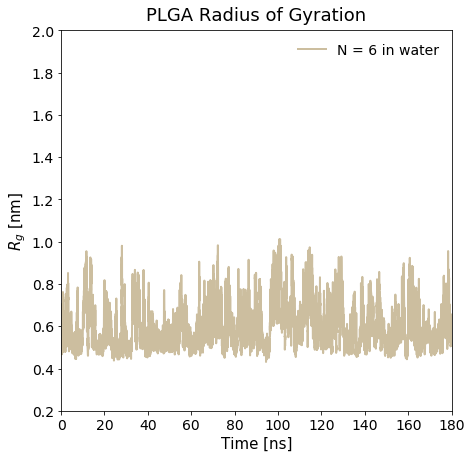

In [21]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plga_rgens_wat[0]/10,linewidth=2, color='#CCBE9F')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 6 PLGA/water system

In [22]:
# x values
blen_wat = cor_n6plga_wat[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_wat

array([ 0.        ,  5.50658351, 11.01316701, 16.51975052, 22.02633402])

In [23]:
mk_n6p_wat = cor_n6plga_wat[1]/cor_n6plga_wat[0]
mk_n6p_wat

array([6.37452382e-17, 8.65327043e-02, 3.87858057e-01, 8.76832893e-01,
       1.74070577e+00])

<ErrorbarContainer object of 3 artists>

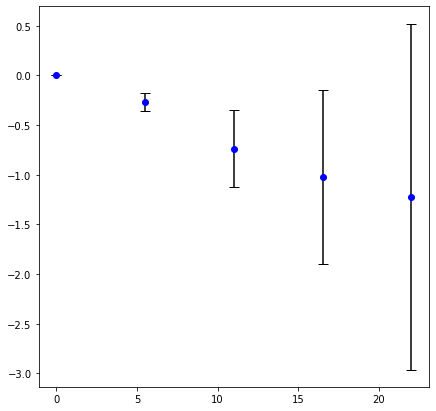

In [24]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_wat, np.log(cor_n6plga_wat[0]), yerr=mk_n6p_wat, color='b', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [25]:
# All the points give the best fits for N = 6 peg in water
n6_blksplga_wat , n6plga_lpwat = bavg_pers_cnt(5, plga_n6wat, n6_plga_wat, lb_avg_pn6, 3, 3000 , 18000)

3000
6000
Lp [Angstroms]: 13.649490367520398
Error in Lp from fit [Angstroms], 95% CL : 2.8122943936544975
R2 score: 0.9567096793613151
6000
9000
Lp [Angstroms]: 16.886737663152484
Error in Lp from fit [Angstroms], 95% CL : 2.3772272835489017
R2 score: 0.9785070583999382
9000
12000
Lp [Angstroms]: 18.640081115374368
Error in Lp from fit [Angstroms], 95% CL : 2.6771065551568043
R2 score: 0.9776869864464767
12000
15000
Lp [Angstroms]: 16.14097415789967
Error in Lp from fit [Angstroms], 95% CL : 2.5579259984696785
R2 score: 0.9732015874918136
15000
18000
Lp [Angstroms]: 14.735745279787597
Error in Lp from fit [Angstroms], 95% CL : 3.071563655109499
R2 score: 0.955796726463846


In [26]:
n6_blksplga_wat

{'Avg Radius of gyration': array([5.70670027, 6.05636599, 6.52068659, 5.94843621, 5.77708912]),
 'Avg persistence length': array([13.64949037, 16.88673766, 18.64008112, 16.14097416, 14.73574528])}

In [27]:
n6plga_lpwat

array([[ 1.36494904e+01,  1.68867377e+01,  1.86400811e+01,
         1.61409742e+01,  1.47357453e+01],
       [ 2.81229439e+00,  2.37722728e+00,  2.67710656e+00,
         2.55792600e+00,  3.07156366e+00],
       [-7.32628086e-02, -5.92180692e-02, -5.36478352e-02,
        -6.19541293e-02, -6.78621937e-02],
       [ 5.59807799e-03,  1.70742452e-03,  1.45855648e-03,
         2.36831852e-03,  4.91602117e-03]])

In [28]:
n6plga_lpwat[2]

array([-0.07326281, -0.05921807, -0.05364784, -0.06195413, -0.06786219])

In [29]:
np.mean(n6plga_lpwat[3])

0.003209679734466512

In [30]:
def line_fit(slope, x):
    return slope*x 

In [32]:
blen_wat

array([ 0.        ,  5.50658351, 11.01316701, 16.51975052, 22.02633402])

In [33]:
gg_n6plga_wat = line_fit(np.mean(n6plga_lpwat[2]),blen_wat)

In [34]:
gg_n6plga_wat

array([-0.        , -0.34795554, -0.69591109, -1.04386663, -1.39182218])

### Block averaged Radius of gyration and persistence length, N = 6 PLGA/water system

In [35]:
np.mean(n6_blksplga_wat["Avg persistence length"])

16.010605716746902

In [36]:
np.std(n6_blksplga_wat["Avg persistence length"])

1.7262027004975502

In [37]:
np.mean(n6_blksplga_wat["Avg Radius of gyration"])

6.0018556350457155

In [38]:
np.std(n6_blksplga_wat["Avg Radius of gyration"])

0.2872793934594806

Text(0.5, -1.82, '$N_{PLGA}$ = 6: $L_{p}$ = 32.9 $\\AA$ ± 5.81 $\\AA$')

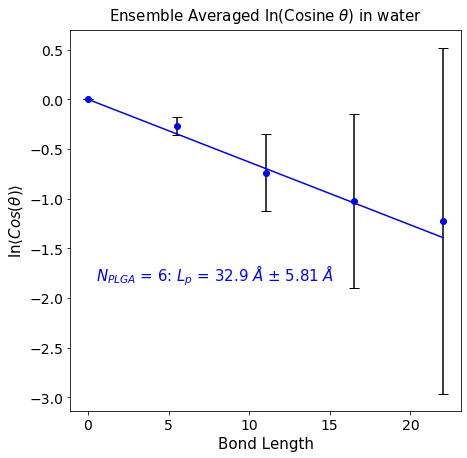

In [44]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_wat, np.log(cor_n6plga_wat[0]), yerr=mk_n6p_wat, color='b', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_wat, gg_n6plga_wat, color='b')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in water', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
#plt.ylim(-1.9,0)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.tick_params(labelsize=14)
plt.text(0.5, -1.82,r'$N_{PLGA}$ = 6: $L_{p}$ = 16.0 $\AA$ ± 1.73 $\AA$', fontsize=15, color='b')
#plt.text(5,-0.15,r'R$^{2}$ = 0.98', fontsize=15, color='blue')

In [45]:
rgplga_olig_wat =  pd.DataFrame(data=n6_blksplga_wat["Avg Radius of gyration"]
                                  , columns=['$R_{g}$ [Angstrom] N = 6 PLGA in water'])
rgplga_olig_wat

,$R_{g}$ [Angstrom] N = 6 PLGA in water
0,5.706700
1,6.056366
2,6.520687
3,5.948436
4,5.777089


In [46]:
pers_plgat_wat = pd.DataFrame(data=n6_blksplga_wat["Avg persistence length"]
                                , columns=[r"$L_{p}$ [Angstrom] N = 6 PLGA in water"])
pers_plgat_wat

,$L_{p}$ [Angstrom] N = 6 PLGA in water
0,13.649490
1,16.886738
2,18.640081
3,16.140974
4,14.735745


### N = 8 PLGA/water system

In [47]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n8_plga_wat = mda.Universe("n8plga_wat/n8plgaonly_wat.pdb", "n8plga_wat/nowat_n8plga.xtc")

In [48]:
n8_plga_wat.trajectory

<XTCReader n8plga_wat/nowat_n8plga.xtc with 18001 frames of 123 atoms>

In [49]:
len(n8_plga_wat.trajectory)

18001

In [50]:
#Select the polymer heavy atoms 
plga_n8wat = n8_plga_wat.select_atoms("resname sPLG PLG tPLG and not type H")

In [51]:
crv_n8plga_wat = pers_length(plga_n8wat,8)
crv_n8plga_wat

array([[ 1.        ,  0.92897105,  0.89341132,  0.84907712,  0.81432404,
         0.80025647,  0.882993  ],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ],
       [ 0.        , 21.7250151 , 26.69490795, 31.88856629, 35.47942095,
        36.84539989, 27.99445773]])

In [52]:
com_bond_n8wat = np.zeros(shape=(1,18000))
count = 0
for ts in n8_plga_wat.trajectory[0:18000]:
    n8_mon1_wat = n8_plga_wat.select_atoms("resid 1")
    n8_mon2_wat = n8_plga_wat.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n8_mon1_wat.center_of_mass(), n8_mon2_wat.center_of_mass(), 
                                                   box=n8_plga_wat.trajectory.ts.dimensions)
    com_bond_n8wat[0, count] = oo_len
    count += 1
    

In [53]:
com_bond

array([[5.80601904, 6.02340271, 6.5301031 , ..., 6.12709611, 6.28884022,
        5.85774912]])

In [54]:
np.std(com_bond)

0.7774540112069643

In [55]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

5.5065835054684165

In [56]:
np.mean(com_bond_n8wat)

5.495630698650939

In [57]:
np.std(com_bond_n8wat)

0.776440727755075

### Radius of Gyration vs. time N = 8 PLGA/water system

In [58]:
n8plga_rgens_wat, cor_n8plga_wat, N8plga_cos_wat, rgwat_n8plga = get_rg_pers_poly(plga_n8wat, n8_plga_wat, 0, 18000)

In [59]:
n8plga_rgens_wat[0].shape

(18000,)

In [60]:
cor_n8plga_wat[3]

array([0., 1., 2., 3., 4., 5., 6.])

In [61]:
N8plga_cos_wat

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.92897105, 0.8949869 , 0.8805186 , ..., 0.73419893, 0.74386491,
        0.75085447],
       [0.89341132, 0.85821632, 0.76338383, ..., 0.41965625, 0.42832976,
        0.36910811],
       ...,
       [0.81432404, 0.77355169, 0.73638817, ..., 0.1182017 , 0.18943496,
        0.0397003 ],
       [0.80025647, 0.78422355, 0.73346108, ..., 0.41748781, 0.46071055,
        0.29320364],
       [0.882993  , 0.93504792, 0.95732404, ..., 0.5413031 , 0.40841995,
        0.4792026 ]])

In [62]:
rgwat_n8plga

6.723531449586735

In [63]:
np.std(n8plga_rgens_wat)

1.2067862077994864

(0.2, 2)

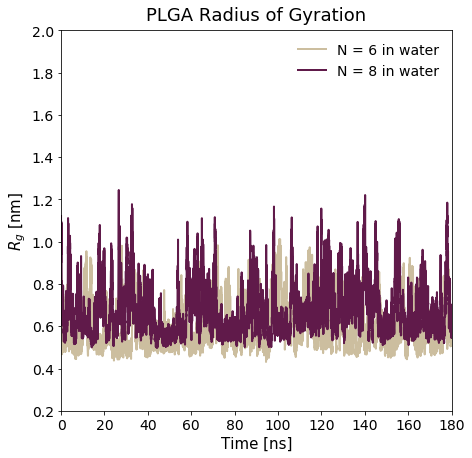

In [64]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plga_rgens_wat[0]/10,linewidth=2, color='#CCBE9F')
plt.plot(trj_len/100, n8plga_rgens_wat[0]/10,linewidth=2, color='#601A4A')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water','N = 8 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 8 PLGA/water system

In [65]:
# x values
blen_n8wat = cor_n8plga_wat[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n8wat

array([ 0.        ,  5.50658351, 11.01316701, 16.51975052, 22.02633402,
       27.53291753, 33.03950103])

In [66]:
mk_n8p_wat = cor_n8plga_wat[1]/cor_n8plga_wat[0]
mk_n8p_wat

array([4.26308936e-17, 7.23710587e-02, 2.60087613e-01, 5.11194399e-01,
       8.78064452e-01, 1.17219971e+00, 1.54810492e+00])

<ErrorbarContainer object of 3 artists>

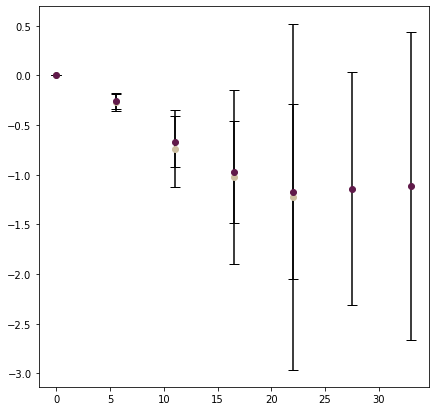

In [67]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_wat, np.log(cor_n6plga_wat[0]), yerr=mk_n6p_wat, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8wat, np.log(cor_n8plga_wat[0]), yerr=mk_n8p_wat, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [68]:
# All the points give the best fits for N = 6 peg in water
n8_blksplga_wat , n8plga_lpwat = bavg_pers_cnt(5, plga_n8wat, n8_plga_wat, lb_avg_pn6, 4, 3000 , 18000)

3000
6000
Lp [Angstroms]: 15.403483794100232
Error in Lp from fit [Angstroms], 95% CL : 0.8941300969747815
R2 score: 0.9893876092645152
6000
9000
Lp [Angstroms]: 17.735536086116202
Error in Lp from fit [Angstroms], 95% CL : 2.30091783153265
R2 score: 0.9412179950213494
9000
12000
Lp [Angstroms]: 15.654572484908671
Error in Lp from fit [Angstroms], 95% CL : 1.654360339100474
R2 score: 0.9677849663638235
12000
15000
Lp [Angstroms]: 21.15625319373912
Error in Lp from fit [Angstroms], 95% CL : 0.7858761871374539
R2 score: 0.9951566635103407
15000
18000
Lp [Angstroms]: 16.104727837915163
Error in Lp from fit [Angstroms], 95% CL : 1.2049589753678762
R2 score: 0.9830109581291678


In [69]:
n8_blksplga_wat

{'Avg Radius of gyration': array([6.50134084, 6.63553471, 6.59460847, 7.20983468, 6.68017275]),
 'Avg persistence length': array([15.40348379, 17.73553609, 15.65457248, 21.15625319, 16.10472784])}

In [70]:
n8plga_lpwat

array([[ 1.54034838e+01,  1.77355361e+01,  1.56545725e+01,
         2.11562532e+01,  1.61047278e+01],
       [ 8.94130097e-01,  2.30091783e+00,  1.65436034e+00,
         7.85876187e-01,  1.20495898e+00],
       [-6.49203786e-02, -5.63839737e-02, -6.38790999e-02,
        -4.72673488e-02, -6.20935672e-02],
       [ 1.86014136e-03,  7.00882611e-03,  5.96919435e-03,
         4.03806757e-04,  2.82716600e-03]])

In [71]:
n8plga_lpwat[2]

array([-0.06492038, -0.05638397, -0.0638791 , -0.04726735, -0.06209357])

In [72]:
np.mean(n8plga_lpwat[3])

0.0036138269151425872

In [73]:
blen_n8wat

array([ 0.        ,  5.50658351, 11.01316701, 16.51975052, 22.02633402,
       27.53291753, 33.03950103])

In [74]:
gg_n8plga_wat = line_fit(np.mean(n8plga_lpwat[2]),blen_n8wat)

In [75]:
gg_n6plga_n8wat = line_fit(np.mean(n6plga_lpwat[2]),blen_n8wat)

In [76]:
gg_n8plga_wat

array([-0.        , -0.32438663, -0.64877326, -0.9731599 , -1.29754653,
       -1.62193316, -1.94631979])

### Block averaged Radius of gyration and persistence length, N = 8 PLGA/water system

In [77]:
np.mean(n8_blksplga_wat["Avg persistence length"])

17.210914679355877

In [78]:
np.std(n8_blksplga_wat["Avg persistence length"])

2.1332407446360233

In [79]:
np.mean(n8_blksplga_wat["Avg Radius of gyration"])

6.724298288597474

In [80]:
np.std(n8_blksplga_wat["Avg Radius of gyration"])

0.2498403878746405

Text(0.5, -6.54, '$N_{PLGA}$ = 8: $L_{p}$ = 30.0 $\\AA$ ± 4.44 $\\AA$')

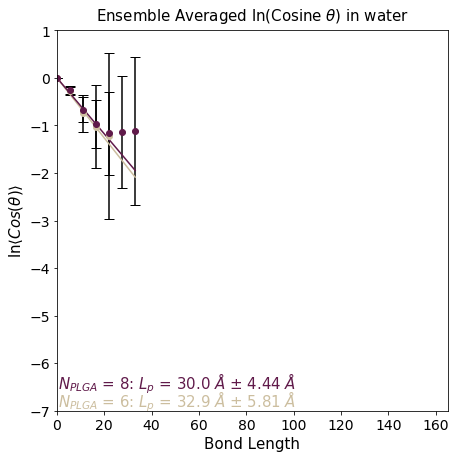

In [81]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_wat, np.log(cor_n6plga_wat[0]), yerr=mk_n6p_wat, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8wat, np.log(cor_n8plga_wat[0]), yerr=mk_n8p_wat, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n8wat, gg_n6plga_n8wat, color='#CCBE9F')
plt.plot(blen_n8wat, gg_n8plga_wat, color='#601A4A')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in water', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-7,1)
plt.xlim(0,165)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
#plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 10.7 $\AA$ ± 1.62 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
plt.text(0.5, -6.92,r'$N_{PLGA}$ = 6: $L_{p}$ = 16.0 $\AA$ ± 1.73 $\AA$', fontsize=15, color='#CCBE9F')
plt.text(0.5, -6.54,r'$N_{PLGA}$ = 8: $L_{p}$ = 17.2 $\AA$ ± 2.13 $\AA$', fontsize=15, color='#601A4A')

In [82]:
rgplga_olig_wat[r"$R_{g}$ [Angstrom] N = 8 PLGA in water"] = n8_blksplga_wat["Avg Radius of gyration"]
rgplga_olig_wat

,$R_{g}$ [Angstrom] N = 6 PLGA in water,$R_{g}$ [Angstrom] N = 8 PLGA in water
0,5.706700,6.501341
1,6.056366,6.635535
2,6.520687,6.594608
3,5.948436,7.209835
4,5.777089,6.680173


In [83]:
pers_plgat_wat[r"$L_{p}$ [Angstrom] N = 8 PLGA in water"] = n8_blksplga_wat["Avg persistence length"]
pers_plgat_wat

,$L_{p}$ [Angstrom] N = 6 PLGA in water,$L_{p}$ [Angstrom] N = 8 PLGA in water
0,13.649490,15.403484
1,16.886738,17.735536
2,18.640081,15.654572
3,16.140974,21.156253
4,14.735745,16.104728


### N = 10 PLGA/water system

In [84]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n10_plga_wat = mda.Universe("n10plga_wat/n10plgaonly_wat.pdb", "n10plga_wat/nowat_n10plga.xtc")

In [85]:
n10_plga_wat.trajectory

<XTCReader n10plga_wat/nowat_n10plga.xtc with 18001 frames of 153 atoms>

In [86]:
len(n10_plga_wat.trajectory)

18001

In [87]:
#Select the polymer heavy atoms 
plga_n10wat = n10_plga_wat.select_atoms("resname sPLG PLG tPLG and not type H")

In [89]:
crv_n10plga_wat = pers_length(plga_n10wat,10)
crv_n10plga_wat

array([[ 1.        ,  0.91663881,  0.89235701,  0.8031246 ,  0.78184933,
         0.68818055,  0.71655788,  0.59444382,  0.76258547],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ,  7.        ,  8.        ],
       [ 0.        , 23.56045739, 26.82906162, 36.57047618, 38.56978872,
        46.51374401, 44.22898062, 53.52700631, 40.3073398 ]])

In [90]:
com_bond_n10wat = np.zeros(shape=(1,18000))
count = 0
for ts in n10_plga_wat.trajectory[0:18000]:
    n10_mon1_wat = n10_plga_wat.select_atoms("resid 1")
    n10_mon2_wat = n10_plga_wat.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n10_mon1_wat.center_of_mass(), n10_mon2_wat.center_of_mass(), 
                                                   box=n10_plga_wat.trajectory.ts.dimensions)
    com_bond_n10wat[0, count] = oo_len
    count += 1
    

In [91]:
com_bond

array([[5.80601904, 6.02340271, 6.5301031 , ..., 6.12709611, 6.28884022,
        5.85774912]])

In [92]:
np.std(com_bond)

0.7774540112069643

In [93]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

5.5065835054684165

In [94]:
np.mean(com_bond_n10wat)

5.506905761020598

In [95]:
np.std(com_bond_n10wat)

0.7711728242271845

### Radius of Gyration vs. time N = 10 PLGA/water system

In [96]:
n10plga_rgens_wat, cor_n10plga_wat, N10plga_cos_wat, rgwat_n10plga = get_rg_pers_poly(plga_n10wat, n10_plga_wat, 0, 18000)

In [97]:
n10plga_rgens_wat[0].shape

(18000,)

In [98]:
cor_n10plga_wat[3]

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [99]:
N10plga_cos_wat

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.91663881, 0.91254966, 0.91839272, ..., 0.77507228, 0.76394928,
        0.78856532],
       [0.89235701, 0.87912939, 0.8843317 , ..., 0.45955748, 0.42871827,
        0.42727296],
       ...,
       [0.71655788, 0.70695389, 0.66599989, ..., 0.14665757, 0.18428449,
        0.20266414],
       [0.59444382, 0.70751327, 0.66948763, ..., 0.26794852, 0.34681775,
        0.22490735],
       [0.76258547, 0.79689978, 0.59233943, ..., 0.34853517, 0.35211337,
        0.20433422]])

In [100]:
rgwat_n10plga

7.210249972265769

In [101]:
np.std(n10plga_rgens_wat)

1.2870187253609593

(0.2, 2)

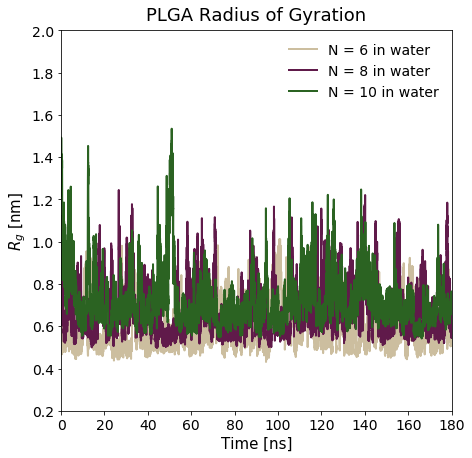

In [102]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plga_rgens_wat[0]/10,linewidth=2, color='#CCBE9F')
plt.plot(trj_len/100, n8plga_rgens_wat[0]/10,linewidth=2, color='#601A4A')
plt.plot(trj_len/100, n10plga_rgens_wat[0]/10,linewidth=2, color='#2B6322')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water','N = 8 in water','N = 10 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 10 PLGA/water system

In [103]:
# x values
blen_n10wat = cor_n10plga_wat[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n10wat

array([ 0.        ,  5.50658351, 11.01316701, 16.51975052, 22.02633402,
       27.53291753, 33.03950103, 38.54608454, 44.05266804])

In [104]:
mk_n10p_wat = cor_n10plga_wat[1]/cor_n10plga_wat[0]
mk_n10p_wat

array([4.31894356e-17, 5.36401282e-02, 1.97536713e-01, 4.30177202e-01,
       6.86355390e-01, 8.03566007e-01, 8.38808800e-01, 1.11596914e+00,
       1.85930580e+00])

<ErrorbarContainer object of 3 artists>

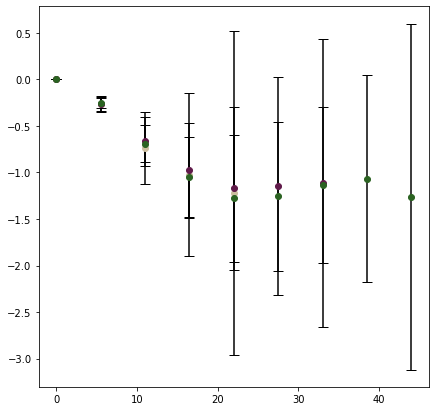

In [105]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_wat, np.log(cor_n6plga_wat[0]), yerr=mk_n6p_wat, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8wat, np.log(cor_n8plga_wat[0]), yerr=mk_n8p_wat, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10wat, np.log(cor_n10plga_wat[0]), yerr=mk_n10p_wat, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [106]:
# All the points give the best fits for N = 6 peg in water
n10_blksplga_wat , n10plga_lpwat = bavg_pers_cnt(5, plga_n10wat, n10_plga_wat, lb_avg_pn6, 4, 3000 , 18000)

3000
6000
Lp [Angstroms]: 17.64298254677753
Error in Lp from fit [Angstroms], 95% CL : 0.5479422994590052
R2 score: 0.9917490643994316
6000
9000
Lp [Angstroms]: 15.698494153069646
Error in Lp from fit [Angstroms], 95% CL : 0.6620013478365502
R2 score: 0.9853382856798059
9000
12000
Lp [Angstroms]: 15.497432704911102
Error in Lp from fit [Angstroms], 95% CL : 0.7582837608074394
R2 score: 0.980873652531152
12000
15000
Lp [Angstroms]: 15.551996180974609
Error in Lp from fit [Angstroms], 95% CL : 0.6867111061930787
R2 score: 0.9840864798222688
15000
18000
Lp [Angstroms]: 14.545328110222847
Error in Lp from fit [Angstroms], 95% CL : 0.6861946677270259
R2 score: 0.9821269308051832


In [107]:
n10_blksplga_wat

{'Avg Radius of gyration': array([7.5398303 , 6.77246089, 7.19704625, 7.50297295, 6.72991089]),
 'Avg persistence length': array([17.64298255, 15.69849415, 15.4974327 , 15.55199618, 14.54532811])}

In [108]:
n10plga_lpwat

array([[ 1.76429825e+01,  1.56984942e+01,  1.54974327e+01,
         1.55519962e+01,  1.45453281e+01],
       [ 5.47942299e-01,  6.62001348e-01,  7.58283761e-01,
         6.86711106e-01,  6.86194668e-01],
       [-5.66797591e-02, -6.37003773e-02, -6.45268167e-02,
        -6.43004273e-02, -6.87505976e-02],
       [ 1.07849190e-03,  2.51142964e-03,  3.46944274e-03,
         2.80568448e-03,  3.66130441e-03]])

In [109]:
n10plga_lpwat[2]

array([-0.05667976, -0.06370038, -0.06452682, -0.06430043, -0.0687506 ])

In [110]:
np.mean(n10plga_lpwat[3])

0.002705270636273134

In [111]:
blen_n10wat

array([ 0.        ,  5.50658351, 11.01316701, 16.51975052, 22.02633402,
       27.53291753, 33.03950103, 38.54608454, 44.05266804])

In [112]:
gg_n10plga_wat = line_fit(np.mean(n10plga_lpwat[2]),blen_n10wat)

In [113]:
gg_n6plga_n10wat = line_fit(np.mean(n6plga_lpwat[2]),blen_n10wat)

In [114]:
gg_n8plga_n10wat = line_fit(np.mean(n8plga_lpwat[2]),blen_n10wat)

In [115]:
gg_n10plga_wat

array([-0.        , -0.35017243, -0.70034486, -1.05051729, -1.40068973,
       -1.75086216, -2.10103459, -2.45120702, -2.80137945])

### Block averaged Radius of gyration and persistence length, N = 10 PLGA/acetone system

In [116]:
np.mean(n10_blksplga_wat["Avg persistence length"])

15.787246739191147

In [117]:
np.std(n10_blksplga_wat["Avg persistence length"])

1.0132452111593635

In [118]:
np.mean(n10_blksplga_wat["Avg Radius of gyration"])

7.148444254010888

In [119]:
np.std(n10_blksplga_wat["Avg Radius of gyration"])

0.34576566092143884

Text(0.5, -6.14, '$N_{PLGA}$ = 10: $L_{p}$ = 24.9 $\\AA$ ± 4.93 $\\AA$')

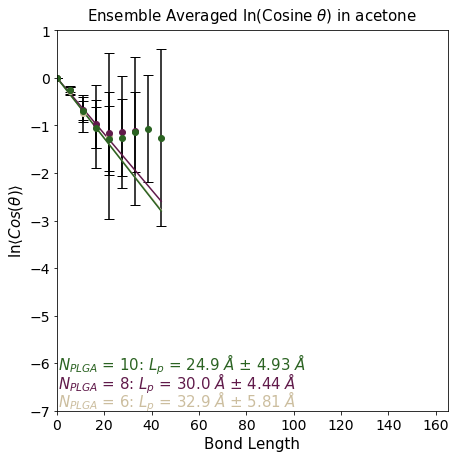

In [120]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_wat, np.log(cor_n6plga_wat[0]), yerr=mk_n6p_wat, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8wat, np.log(cor_n8plga_wat[0]), yerr=mk_n8p_wat, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10wat, np.log(cor_n10plga_wat[0]), yerr=mk_n10p_wat, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n10wat, gg_n6plga_n10wat, color='#CCBE9F')
plt.plot(blen_n10wat, gg_n8plga_n10wat, color='#601A4A')
plt.plot(blen_n10wat, gg_n10plga_wat, color='#2B6322')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in acetone', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-7,1)
plt.xlim(0,165)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
#plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 10.7 $\AA$ ± 1.62 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
plt.text(0.5, -6.92,r'$N_{PLGA}$ = 6: $L_{p}$ = 16.0 $\AA$ ± 1.73 $\AA$', fontsize=15, color='#CCBE9F')
plt.text(0.5, -6.54,r'$N_{PLGA}$ = 8: $L_{p}$ = 17.2 $\AA$ ± 2.13 $\AA$', fontsize=15, color='#601A4A')
plt.text(0.5, -6.14,r'$N_{PLGA}$ = 10: $L_{p}$ = 15.8 $\AA$ ± 1.01 $\AA$', fontsize=15, color='#2B6322')

In [121]:
rgplga_olig_wat[r"$R_{g}$ [Angstrom] N = 10 PLGA in water"] = n10_blksplga_wat["Avg Radius of gyration"]
rgplga_olig_wat

,$R_{g}$ [Angstrom] N = 6 PLGA in water,$R_{g}$ [Angstrom] N = 8 PLGA in water,$R_{g}$ [Angstrom] N = 10 PLGA in water
0,5.706700,6.501341,7.539830
1,6.056366,6.635535,6.772461
2,6.520687,6.594608,7.197046
3,5.948436,7.209835,7.502973
4,5.777089,6.680173,6.729911


In [122]:
pers_plgat_wat[r"$L_{p}$ [Angstrom] N = 10 PLGA in water"] = n10_blksplga_wat["Avg persistence length"]
pers_plgat_wat

,$L_{p}$ [Angstrom] N = 6 PLGA in water,$L_{p}$ [Angstrom] N = 8 PLGA in water,$L_{p}$ [Angstrom] N = 10 PLGA in water
0,13.649490,15.403484,17.642983
1,16.886738,17.735536,15.698494
2,18.640081,15.654572,15.497433
3,16.140974,21.156253,15.551996
4,14.735745,16.104728,14.545328


### N = 20 PLGA/water system

In [123]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n20_plga_wat = mda.Universe("n20plga_wat/n20plgaonly_wat.pdb", "n20plga_wat/nowat_n20plga.xtc")

In [124]:
n20_plga_wat.trajectory

<XTCReader n20plga_wat/nowat_n20plga.xtc with 18001 frames of 303 atoms>

In [125]:
len(n20_plga_wat.trajectory)

18001

In [126]:
#Select the polymer heavy atoms 
plga_n20wat = n20_plga_wat.select_atoms("resname sPLG PLG tPLG and not type H")

In [127]:
crv_n20plga_wat = pers_length(plga_n20wat,20)
crv_n20plga_wat

array([[ 1.        ,  0.87005252,  0.72074325,  0.60887698,  0.64350292,
         0.63446776,  0.62566776,  0.62085279,  0.67041811,  0.67915241,
         0.67665074,  0.64054263,  0.58130744,  0.57425542,  0.7737669 ,
         0.76586963,  0.79697033,  0.77883524,  0.95989991],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ,  7.        ,  8.        ,  9.        ,
        10.        , 11.        , 12.        , 13.        , 14.        ,
        15.        , 16.        , 17.        , 18.        ],
       [ 0.        , 29.53525644, 43.88412097, 52.49165479, 49.94647817,
        50.61947932, 51.26878368, 51.62156384, 47.9006568 , 47.22255541,
        47.41752873, 50.16770597, 54.45744667, 54.95249478, 39.30663153,
        40.01558012, 37.1582435 , 38.84594529, 16.28067276]])

In [128]:
com_bond_n20wat = np.zeros(shape=(1,18000))
count = 0
for ts in n20_plga_wat.trajectory[0:18000]:
    n20_mon1_wat = n20_plga_wat.select_atoms("resid 1")
    n20_mon2_wat = n20_plga_wat.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n20_mon1_wat.center_of_mass(), n20_mon2_wat.center_of_mass(), 
                                                   box=n20_plga_wat.trajectory.ts.dimensions)
    com_bond_n20wat[0, count] = oo_len
    count += 1
    

In [129]:
com_bond

array([[5.80601904, 6.02340271, 6.5301031 , ..., 6.12709611, 6.28884022,
        5.85774912]])

In [130]:
np.std(com_bond)

0.7774540112069643

In [131]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

5.5065835054684165

In [132]:
np.mean(com_bond_n20wat)

5.60153773652553

In [133]:
np.std(com_bond_n20wat)

0.8009918646863536

### Radius of Gyration vs. time N = 20 PLGA/water system

In [134]:
n20plga_rgens_wat, cor_n20plga_wat, N20plga_cos_wat, rgwat_n20plga = get_rg_pers_poly(plga_n20wat, n20_plga_wat, 0, 18000)

In [135]:
n20plga_rgens_wat[0].shape

(18000,)

In [136]:
cor_n20plga_wat[3]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18.])

In [137]:
N20plga_cos_wat

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.87005252,  0.88300143,  0.87232296, ...,  0.7954533 ,
         0.78594466,  0.78982515],
       [ 0.72074325,  0.71531569,  0.74786165, ...,  0.54583492,
         0.53242061,  0.53786984],
       ...,
       [ 0.79697033,  0.85594646,  0.92193563, ...,  0.2522648 ,
         0.3012559 ,  0.20333426],
       [ 0.77883524,  0.83315382,  0.89409717, ..., -0.07580966,
        -0.0398831 , -0.10245427],
       [ 0.95989991,  0.99013513,  0.98304843, ...,  0.22056317,
         0.02957364,  0.3400266 ]])

In [138]:
rgwat_n20plga

8.405981816700848

In [139]:
np.std(n20plga_rgens_wat)

1.080600782361091

(0.2, 2)

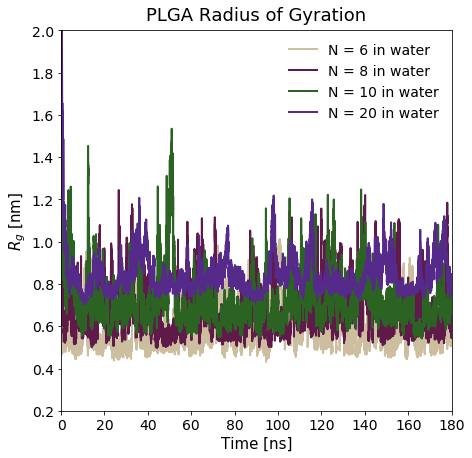

In [141]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plga_rgens_wat[0]/10,linewidth=2, color='#CCBE9F')
plt.plot(trj_len/100, n8plga_rgens_wat[0]/10,linewidth=2, color='#601A4A')
plt.plot(trj_len/100, n10plga_rgens_wat[0]/10,linewidth=2, color='#2B6322')
plt.plot(trj_len/100, n20plga_rgens_wat[0]/10,linewidth=2, color='#562A8B')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water','N = 8 in water','N = 10 in water','N = 20 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 20 PLGA/water system

In [142]:
# x values
blen_n20wat = cor_n20plga_wat[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n20wat

array([ 0.        ,  5.50658351, 11.01316701, 16.51975052, 22.02633402,
       27.53291753, 33.03950103, 38.54608454, 44.05266804, 49.55925155,
       55.06583505, 60.57241856, 66.07900207, 71.58558557, 77.09216908,
       82.59875258, 88.10533609, 93.61191959, 99.1185031 ])

In [143]:
mk_n20p_wat = cor_n20plga_wat[1]/cor_n20plga_wat[0]
mk_n20p_wat

array([2.36384533e-17, 2.83386555e-02, 1.10697378e-01, 1.92117791e-01,
       3.44916403e-01, 4.24016792e-01, 4.98371787e-01, 5.02657474e-01,
       6.33812668e-01, 9.40395549e-01, 9.56920980e-01, 1.06779288e+00,
       1.07289285e+00, 1.08644277e+00, 1.64185037e+00, 1.40782530e+00,
       1.43213191e+00, 1.35012789e+00, 1.34746469e+00])

<ErrorbarContainer object of 3 artists>

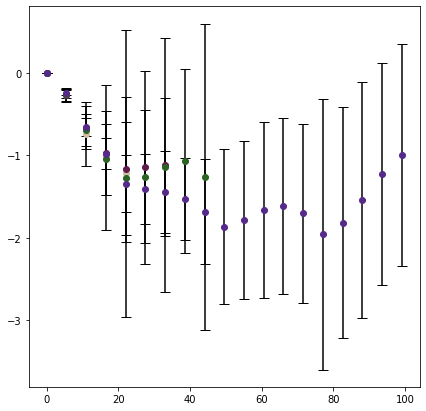

In [144]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_wat, np.log(cor_n6plga_wat[0]), yerr=mk_n6p_wat, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8wat, np.log(cor_n8plga_wat[0]), yerr=mk_n8p_wat, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10wat, np.log(cor_n10plga_wat[0]), yerr=mk_n10p_wat, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20wat, np.log(cor_n20plga_wat[0]), yerr=mk_n20p_wat, color='#562A8B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [145]:
# All the points give the best fits for N = 6 peg in water
n20_blksplga_wat, n20plga_lpwat = bavg_pers_cnt(5, plga_n20wat, n20_plga_wat, lb_avg_pn6, 4, 3000 , 18000)

3000
6000
Lp [Angstroms]: 18.373911377419272
Error in Lp from fit [Angstroms], 95% CL : 0.1914152754292214
R2 score: 0.9874038509639695
6000
9000
Lp [Angstroms]: 17.418390643535023
Error in Lp from fit [Angstroms], 95% CL : 0.20822718122876016
R2 score: 0.9836730678625764
9000
12000
Lp [Angstroms]: 17.471946084855052
Error in Lp from fit [Angstroms], 95% CL : 0.1734641677477271
R2 score: 0.9884613963163308
12000
15000
Negative cosine theta values present, doing exponential fit...
Lp [Angstroms], Exp. fit: 19.563722865223493
Error in Lp from fit [Angstroms]: 0.006201747444604848
15000
18000
Lp [Angstroms]: 15.038379283952064
Error in Lp from fit [Angstroms], 95% CL : 0.20005222769592695
R2 score: 0.9793802722868917


In [146]:
n20_blksplga_wat

{'Avg Radius of gyration': array([8.46041127, 8.19817489, 8.55640943, 8.26642961, 8.43102691]),
 'Avg persistence length': array([18.37391138, 17.41839064, 17.47194608, 19.56372287, 15.03837928])}

In [147]:
n20plga_lpwat

array([[ 1.83739114e+01,  1.74183906e+01,  1.74719461e+01,
         1.95637229e+01,  1.50383793e+01],
       [ 1.91415275e-01,  2.08227181e-01,  1.73464168e-01,
         6.20174744e-03,  2.00052228e-01],
       [-5.44249931e-02, -5.74105852e-02, -5.72346088e-02,
        -5.11150156e-02, -6.64965274e-02],
       [ 1.57725426e-03,  2.31098821e-03,  1.58419787e-03,
         0.00000000e+00,  3.83917264e-03]])

In [148]:
n20plga_lpwat[2]

array([-0.05442499, -0.05741059, -0.05723461, -0.05111502, -0.06649653])

In [149]:
np.mean(n20plga_lpwat[3])

0.0018623225947096392

In [150]:
blen_n20wat

array([ 0.        ,  5.50658351, 11.01316701, 16.51975052, 22.02633402,
       27.53291753, 33.03950103, 38.54608454, 44.05266804, 49.55925155,
       55.06583505, 60.57241856, 66.07900207, 71.58558557, 77.09216908,
       82.59875258, 88.10533609, 93.61191959, 99.1185031 ])

In [151]:
gg_n20plga_wat = line_fit(np.mean(n20plga_lpwat[2]),blen_n20wat)

In [152]:
gg_n6plga_n20wat = line_fit(np.mean(n6plga_lpwat[2]),blen_n20wat)

In [153]:
gg_n8plga_n20wat = line_fit(np.mean(n8plga_lpwat[2]),blen_n20wat)

In [154]:
gg_n10plga_n20wat = line_fit(np.mean(n10plga_lpwat[2]),blen_n20wat)

In [155]:
gg_n20plga_wat

array([-0.        , -0.31572738, -0.63145475, -0.94718213, -1.26290951,
       -1.57863689, -1.89436426, -2.21009164, -2.52581902, -2.8415464 ,
       -3.15727377, -3.47300115, -3.78872853, -4.10445591, -4.42018328,
       -4.73591066, -5.05163804, -5.36736541, -5.68309279])

### Block averaged Radius of gyration and persistence length, N = 20 PLGA/water system

In [156]:
np.mean(n20_blksplga_wat["Avg persistence length"])

17.57327005099698

In [157]:
np.std(n20_blksplga_wat["Avg persistence length"])

1.4874712983488152

In [158]:
np.mean(n20_blksplga_wat["Avg Radius of gyration"])

8.382490422505887

In [159]:
np.std(n20_blksplga_wat["Avg Radius of gyration"])

0.13123840602412118

Text(0.5, -5.7, '$N_{PLGA}$ = 20: $L_{p}$ = 27.5 $\\AA$ ± 3.38 $\\AA$')

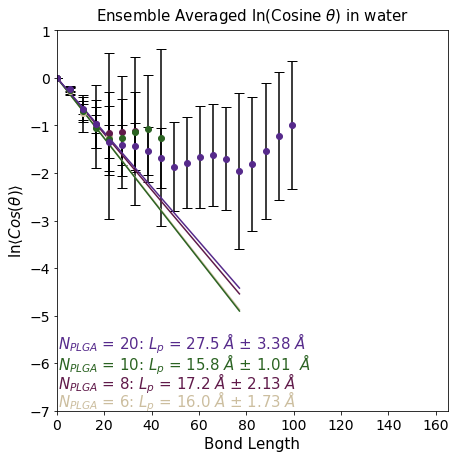

In [160]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_wat, np.log(cor_n6plga_wat[0]), yerr=mk_n6p_wat, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8wat, np.log(cor_n8plga_wat[0]), yerr=mk_n8p_wat, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10wat, np.log(cor_n10plga_wat[0]), yerr=mk_n10p_wat, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20wat, np.log(cor_n20plga_wat[0]), yerr=mk_n20p_wat, color='#562A8B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n20wat[:15], gg_n6plga_n20wat[:15], color='#CCBE9F')
plt.plot(blen_n20wat[:15], gg_n8plga_n20wat[:15], color='#601A4A')
plt.plot(blen_n20wat[:15], gg_n10plga_n20wat[:15], color='#2B6322')
plt.plot(blen_n20wat[:15], gg_n20plga_wat[:15], color='#562A8B')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in water', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-7,1)
plt.xlim(0,165)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
#plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 10.7 $\AA$ ± 1.62 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
plt.text(0.5, -6.92,r'$N_{PLGA}$ = 6: $L_{p}$ = 16.0 $\AA$ ± 1.73 $\AA$', fontsize=15, color='#CCBE9F')
plt.text(0.5, -6.54,r'$N_{PLGA}$ = 8: $L_{p}$ = 17.2 $\AA$ ± 2.13 $\AA$', fontsize=15, color='#601A4A')
plt.text(0.5, -6.14,r'$N_{PLGA}$ = 10: $L_{p}$ = 15.8 $\AA$ ± 1.01  $\AA$', fontsize=15, color='#2B6322')
plt.text(0.5, -5.70,r'$N_{PLGA}$ = 20: $L_{p}$ = 17.6 $\AA$ ± 1.49 $\AA$', fontsize=15, color='#562A8B')

In [161]:
rgplga_olig_wat[r"$R_{g}$ [Angstrom] N = 20 PLGA in water"] = n20_blksplga_wat["Avg Radius of gyration"]
rgplga_olig_wat

,$R_{g}$ [Angstrom] N = 6 PLGA in water,$R_{g}$ [Angstrom] N = 8 PLGA in water,$R_{g}$ [Angstrom] N = 10 PLGA in water,$R_{g}$ [Angstrom] N = 20 PLGA in water
0,5.706700,6.501341,7.539830,8.460411
1,6.056366,6.635535,6.772461,8.198175
2,6.520687,6.594608,7.197046,8.556409
3,5.948436,7.209835,7.502973,8.266430
4,5.777089,6.680173,6.729911,8.431027


In [162]:
pers_plgat_wat[r"$L_{p}$ [Angstrom] N = 20 PLGA in water"] = n20_blksplga_wat["Avg persistence length"]
pers_plgat_wat

,$L_{p}$ [Angstrom] N = 6 PLGA in water,$L_{p}$ [Angstrom] N = 8 PLGA in water,$L_{p}$ [Angstrom] N = 10 PLGA in water,$L_{p}$ [Angstrom] N = 20 PLGA in water
0,13.649490,15.403484,17.642983,18.373911
1,16.886738,17.735536,15.698494,17.418391
2,18.640081,15.654572,15.497433,17.471946
3,16.140974,21.156253,15.551996,19.563723
4,14.735745,16.104728,14.545328,15.038379


### N = 30 PLGA/water system

In [163]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n30_plga_wat = mda.Universe("n30plga_wat/n30plgaonly_wat.pdb", "n30plga_wat/nowat_n30plga.xtc")

In [164]:
n30_plga_wat.trajectory

<XTCReader n30plga_wat/nowat_n30plga.xtc with 18001 frames of 453 atoms>

In [165]:
len(n30_plga_wat.trajectory)

18001

In [166]:
#Select the polymer heavy atoms 
plga_n30wat = n30_plga_wat.select_atoms("resname sPLG PLG tPLG and not type H")

In [167]:
crv_n30plga_wat = pers_length(plga_n30wat,30)
crv_n30plga_wat

array([[ 1.        ,  0.85010996,  0.66674573,  0.57899683,  0.54734174,
         0.50677746,  0.48080461,  0.47962254,  0.48613992,  0.51788917,
         0.5690293 ,  0.62288902,  0.59141678,  0.55028663,  0.51791388,
         0.49701265,  0.51408595,  0.58600773,  0.57752465,  0.59661288,
         0.66684519,  0.70624882,  0.69632373,  0.75384358,  0.79050683,
         0.74839966,  0.74878001,  0.88909904,  0.84463297],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ,  7.        ,  8.        ,  9.        ,
        10.        , 11.        , 12.        , 13.        , 14.        ,
        15.        , 16.        , 17.        , 18.        , 19.        ,
        20.        , 21.        , 22.        , 23.        , 24.        ,
        25.        , 26.        , 27.        , 28.        ],
       [ 0.        , 31.77636863, 48.18360699, 54.61998438, 56.81516405,
        59.55058461, 61.26203458, 61.33924736, 60.91281598, 58.80923262,
  

In [168]:
com_bond_n30wat = np.zeros(shape=(1,18000))
count = 0
for ts in n30_plga_wat.trajectory[0:18000]:
    n30_mon1_wat = n30_plga_wat.select_atoms("resid 1")
    n30_mon2_wat = n30_plga_wat.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n30_mon1_wat.center_of_mass(), n30_mon2_wat.center_of_mass(), 
                                                   box=n30_plga_wat.trajectory.ts.dimensions)
    com_bond_n30wat[0, count] = oo_len
    count += 1
    

In [169]:
com_bond

array([[5.80601904, 6.02340271, 6.5301031 , ..., 6.12709611, 6.28884022,
        5.85774912]])

In [170]:
np.std(com_bond)

0.7774540112069643

In [171]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

5.5065835054684165

In [172]:
np.mean(com_bond_n30wat)

5.495542380793217

In [173]:
np.std(com_bond_n30wat)

0.7323073133226505

### Radius of Gyration vs. time N = 30 PLGA/water system

In [174]:
n30plga_rgens_wat, cor_n30plga_wat, N30plga_cos_wat, rgwat_n30plga = get_rg_pers_poly(plga_n30wat, n30_plga_wat, 0, 18000)

In [175]:
n30plga_rgens_wat[0].shape

(18000,)

In [176]:
cor_n30plga_wat[3]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28.])

In [177]:
N30plga_cos_wat

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.85010996, 0.85969436, 0.85996605, ..., 0.80379122, 0.810483  ,
        0.80193757],
       [0.66674573, 0.6516001 , 0.66113223, ..., 0.59889613, 0.59036957,
        0.58848232],
       ...,
       [0.74878001, 0.80666873, 0.86581837, ..., 0.30206117, 0.31193247,
        0.22353417],
       [0.88909904, 0.84656561, 0.89669947, ..., 0.09242544, 0.05106178,
        0.03503806],
       [0.84463297, 0.77566971, 0.77089816, ..., 0.57194597, 0.45604966,
        0.6225449 ]])

In [178]:
rgwat_n30plga

9.824863210345177

In [179]:
np.std(n30plga_rgens_wat)

1.2324880399659064

(0.2, 3)

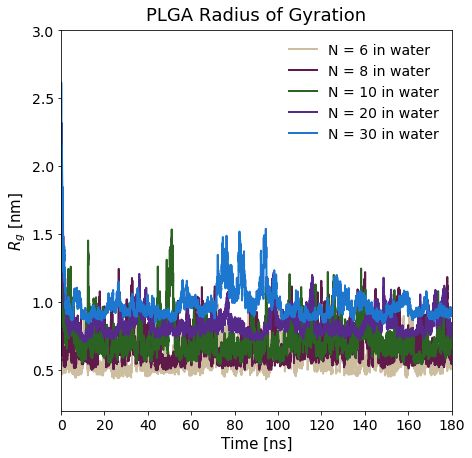

In [202]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plga_rgens_wat[0]/10,linewidth=2, color='#CCBE9F')
plt.plot(trj_len/100, n8plga_rgens_wat[0]/10,linewidth=2, color='#601A4A')
plt.plot(trj_len/100, n10plga_rgens_wat[0]/10,linewidth=2, color='#2B6322')
plt.plot(trj_len/100, n20plga_rgens_wat[0]/10,linewidth=2, color='#562A8B')
plt.plot(trj_len/100, n30plga_rgens_wat[0]/10,linewidth=2, color='#1D77CF')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water','N = 8 in water','N = 10 in water','N = 20 in water','N = 30 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,3)

In [182]:
np.save('n6plga_watRg.npy', n6plga_rgens_wat[0])
np.save('n8plga_watRg.npy', n8plga_rgens_wat[0])
np.save('n10plga_watRg.npy', n10plga_rgens_wat[0])
np.save('n20plga_watRg.npy', n20plga_rgens_wat[0])
np.save('n30plga_watRg.npy', n30plga_rgens_wat[0])

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 30 PLGA/water system

In [183]:
# x values
blen_n30wat = cor_n30plga_wat[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n30wat

array([  0.        ,   5.50658351,  11.01316701,  16.51975052,
        22.02633402,  27.53291753,  33.03950103,  38.54608454,
        44.05266804,  49.55925155,  55.06583505,  60.57241856,
        66.07900207,  71.58558557,  77.09216908,  82.59875258,
        88.10533609,  93.61191959,  99.1185031 , 104.6250866 ,
       110.13167011, 115.63825361, 121.14483712, 126.65142063,
       132.15800413, 137.66458764, 143.17117114, 148.67775465,
       154.18433815])

In [184]:
mk_n30p_wat = cor_n30plga_wat[1]/cor_n30plga_wat[0]
mk_n30p_wat

array([3.41191684e-18, 2.79661909e-02, 7.66378382e-02, 1.21673450e-01,
       1.74711340e-01, 2.70403865e-01, 3.68395280e-01, 4.82783523e-01,
       4.68870281e-01, 4.66986712e-01, 4.67799759e-01, 4.34224968e-01,
       4.36203213e-01, 4.94979224e-01, 6.26172862e-01, 7.48550388e-01,
       6.51027675e-01, 6.22571707e-01, 6.99353946e-01, 7.00198243e-01,
       5.44796565e-01, 6.52075695e-01, 6.83723819e-01, 5.69022185e-01,
       5.78956105e-01, 6.96385285e-01, 7.65889708e-01, 8.89941665e-01,
       1.56027574e+00])

<ErrorbarContainer object of 3 artists>

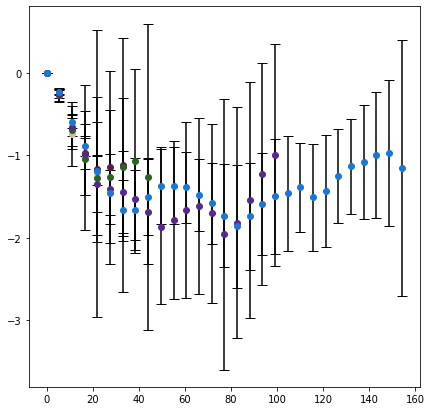

In [185]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_wat, np.log(cor_n6plga_wat[0]), yerr=mk_n6p_wat, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8wat, np.log(cor_n8plga_wat[0]), yerr=mk_n8p_wat, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10wat, np.log(cor_n10plga_wat[0]), yerr=mk_n10p_wat, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20wat, np.log(cor_n20plga_wat[0]), yerr=mk_n20p_wat, color='#562A8B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n30wat, np.log(cor_n30plga_wat[0]), yerr=mk_n30p_wat, color='#1D77CF', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [186]:
# All the points give the best fits for N = 6 peg in water
n30_blksplga_wat , n30plga_lpwat = bavg_pers_cnt(5, plga_n30wat, n30_plga_wat, lb_avg_pn6, 4, 3000 , 18000)

3000
6000
Lp [Angstroms]: 17.727447108590145
Error in Lp from fit [Angstroms], 95% CL : 0.09684021419715756
R2 score: 0.9862007704415356
6000
9000
Lp [Angstroms]: 17.665581164139887
Error in Lp from fit [Angstroms], 95% CL : 0.070451862450756
R2 score: 0.9923230279726712
9000
12000
Lp [Angstroms]: 17.713669938839136
Error in Lp from fit [Angstroms], 95% CL : 0.07996028692111741
R2 score: 0.9901934975885918
12000
15000
Lp [Angstroms]: 19.394280286943523
Error in Lp from fit [Angstroms], 95% CL : 0.10726937192338191
R2 score: 0.9858896648293274
15000
18000
Lp [Angstroms]: 21.4686822839457
Error in Lp from fit [Angstroms], 95% CL : 0.09294545498149397
R2 score: 0.9910737379740906


In [187]:
n30_blksplga_wat

{'Avg Radius of gyration': array([ 9.50918181, 10.605858  ,  9.87507114,  9.60458378,  9.43521037]),
 'Avg persistence length': array([17.72744711, 17.66558116, 17.71366994, 19.39428029, 21.46868228])}

In [188]:
n30plga_lpwat

array([[ 1.77274471e+01,  1.76655812e+01,  1.77136699e+01,
         1.93942803e+01,  2.14686823e+01],
       [ 9.68402142e-02,  7.04518625e-02,  7.99602869e-02,
         1.07269372e-01,  9.29454550e-02],
       [-5.64097015e-02, -5.66072517e-02, -5.64535753e-02,
        -5.15615937e-02, -4.65794773e-02],
       [ 1.86532953e-03,  1.00115683e-03,  1.27568477e-03,
         1.59766485e-03,  7.98847048e-04]])

In [189]:
n30plga_lpwat[2]

array([-0.0564097 , -0.05660725, -0.05645358, -0.05156159, -0.04657948])

In [190]:
np.mean(n30plga_lpwat[3])

0.0013077366036780046

In [191]:
blen_n30wat

array([  0.        ,   5.50658351,  11.01316701,  16.51975052,
        22.02633402,  27.53291753,  33.03950103,  38.54608454,
        44.05266804,  49.55925155,  55.06583505,  60.57241856,
        66.07900207,  71.58558557,  77.09216908,  82.59875258,
        88.10533609,  93.61191959,  99.1185031 , 104.6250866 ,
       110.13167011, 115.63825361, 121.14483712, 126.65142063,
       132.15800413, 137.66458764, 143.17117114, 148.67775465,
       154.18433815])

In [192]:
gg_n30plga_wat = line_fit(np.mean(n30plga_lpwat[2]),blen_n30wat)

In [193]:
gg_n6plga_n30wat = line_fit(np.mean(n6plga_lpwat[2]),blen_n30wat)

In [194]:
gg_n8plga_n30wat = line_fit(np.mean(n8plga_lpwat[2]),blen_n30wat)

In [195]:
gg_n10plga_n30wat = line_fit(np.mean(n10plga_lpwat[2]),blen_n30wat)

In [196]:
gg_n20plga_n30wat = line_fit(np.mean(n20plga_lpwat[2]),blen_n30wat)

In [197]:
gg_n30plga_wat

array([-0.        , -0.29472512, -0.58945025, -0.88417537, -1.1789005 ,
       -1.47362562, -1.76835074, -2.06307587, -2.35780099, -2.65252612,
       -2.94725124, -3.24197636, -3.53670149, -3.83142661, -4.12615174,
       -4.42087686, -4.71560198, -5.01032711, -5.30505223, -5.59977736,
       -5.89450248, -6.1892276 , -6.48395273, -6.77867785, -7.07340298,
       -7.3681281 , -7.66285322, -7.95757835, -8.25230347])

### Block averaged Radius of gyration and persistence length, N = 30 PLGA/water system

In [198]:
np.mean(n30_blksplga_wat["Avg persistence length"])

18.793932156491678

In [199]:
np.std(n30_blksplga_wat["Avg persistence length"])

1.489445460584491

In [200]:
np.mean(n30_blksplga_wat["Avg Radius of gyration"])

9.805981018155155

In [201]:
np.std(n30_blksplga_wat["Avg Radius of gyration"])

0.4267781895964733

Text(0.5, -5.3, '$N_{PLGA}$ = 30: $L_{p}$ = 18.8 $\\AA$ ± 1.49 $\\AA$')

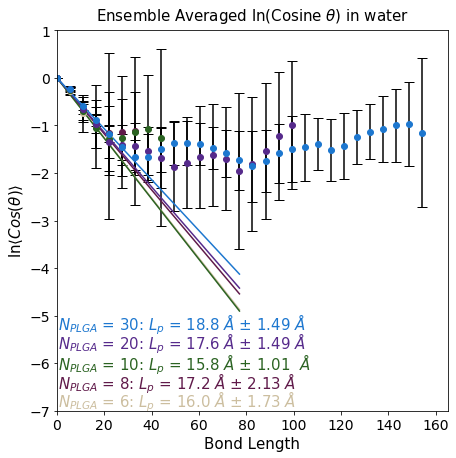

In [205]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_wat, np.log(cor_n6plga_wat[0]), yerr=mk_n6p_wat, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8wat, np.log(cor_n8plga_wat[0]), yerr=mk_n8p_wat, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10wat, np.log(cor_n10plga_wat[0]), yerr=mk_n10p_wat, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20wat, np.log(cor_n20plga_wat[0]), yerr=mk_n20p_wat, color='#562A8B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n30wat, np.log(cor_n30plga_wat[0]), yerr=mk_n30p_wat, color='#1D77CF', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n30wat[:15], gg_n6plga_n30wat[:15], color='#CCBE9F')
plt.plot(blen_n30wat[:15], gg_n8plga_n30wat[:15], color='#601A4A')
plt.plot(blen_n30wat[:15], gg_n10plga_n30wat[:15], color='#2B6322')
plt.plot(blen_n30wat[:15], gg_n20plga_n30wat[:15], color='#562A8B')
plt.plot(blen_n30wat[:15], gg_n30plga_wat[:15], color='#1D77CF')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in water', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-7,1)
plt.xlim(0,165)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
#plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 10.7 $\AA$ ± 1.62 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
plt.text(0.5, -6.92,r'$N_{PLGA}$ = 6: $L_{p}$ = 16.0 $\AA$ ± 1.73 $\AA$', fontsize=15, color='#CCBE9F')
plt.text(0.5, -6.54,r'$N_{PLGA}$ = 8: $L_{p}$ = 17.2 $\AA$ ± 2.13 $\AA$', fontsize=15, color='#601A4A')
plt.text(0.5, -6.14,r'$N_{PLGA}$ = 10: $L_{p}$ = 15.8 $\AA$ ± 1.01  $\AA$', fontsize=15, color='#2B6322')
plt.text(0.5, -5.70,r'$N_{PLGA}$ = 20: $L_{p}$ = 17.6 $\AA$ ± 1.49 $\AA$', fontsize=15, color='#562A8B')
plt.text(0.5, -5.30,r'$N_{PLGA}$ = 30: $L_{p}$ = 18.8 $\AA$ ± 1.49 $\AA$', fontsize=15, color='#1D77CF')

In [206]:
rgplga_olig_wat[r"$R_{g}$ [Angstrom] N = 30 PLGA in water"] = n30_blksplga_wat["Avg Radius of gyration"]
rgplga_olig_wat

,$R_{g}$ [Angstrom] N = 6 PLGA in water,$R_{g}$ [Angstrom] N = 8 PLGA in water,$R_{g}$ [Angstrom] N = 10 PLGA in water,$R_{g}$ [Angstrom] N = 20 PLGA in water,$R_{g}$ [Angstrom] N = 30 PLGA in water
0,5.706700,6.501341,7.539830,8.460411,9.509182
1,6.056366,6.635535,6.772461,8.198175,10.605858
2,6.520687,6.594608,7.197046,8.556409,9.875071
3,5.948436,7.209835,7.502973,8.266430,9.604584
4,5.777089,6.680173,6.729911,8.431027,9.435210


In [207]:
pers_plgat_wat[r"$L_{p}$ [Angstrom] N = 30 PLGA in water"] = n30_blksplga_wat["Avg persistence length"]
pers_plgat_wat

,$L_{p}$ [Angstrom] N = 6 PLGA in water,$L_{p}$ [Angstrom] N = 8 PLGA in water,$L_{p}$ [Angstrom] N = 10 PLGA in water,$L_{p}$ [Angstrom] N = 20 PLGA in water,$L_{p}$ [Angstrom] N = 30 PLGA in water
0,13.649490,15.403484,17.642983,18.373911,17.727447
1,16.886738,17.735536,15.698494,17.418391,17.665581
2,18.640081,15.654572,15.497433,17.471946,17.713670
3,16.140974,21.156253,15.551996,19.563723,19.394280
4,14.735745,16.104728,14.545328,15.038379,21.468682


In [208]:
rgplga_olig_wat.to_pickle("PLGA_water_Rg.pkl")

In [209]:
pers_plgat_wat.to_pickle("PLGA_water_Lp.pkl")

### Fluory Exponent, PLGA/water system

In [210]:
n_plga = np.array([6,8,10,20,30])
rg_nplga_wat = np.array([np.mean(n6_blksplga_wat["Avg Radius of gyration"])
                    ,np.mean(n8_blksplga_wat["Avg Radius of gyration"]),np.mean(n10_blksplga_wat["Avg Radius of gyration"])
                    ,np.mean(n20_blksplga_wat["Avg Radius of gyration"]),np.mean(n30_blksplga_wat["Avg Radius of gyration"])])

In [211]:
rg_nplga_wat

array([6.00185564, 6.72429829, 7.14844425, 8.38249042, 9.80598102])

In [212]:
rgwat_nplga_std = np.array([np.std(np.log10(n6_blksplga_wat["Avg Radius of gyration"]))
                    ,np.std(np.log10(n8_blksplga_wat["Avg Radius of gyration"]))
                        ,np.std(np.log10(n10_blksplga_wat["Avg Radius of gyration"]))
                    ,np.std(np.log10(n20_blksplga_wat["Avg Radius of gyration"]))
                        ,np.std(np.log10(n30_blksplga_wat["Avg Radius of gyration"]))])
rgwat_nplga_std

array([0.02039749, 0.01577225, 0.02108252, 0.0068097 , 0.0184815 ])

In [213]:
n_plga

array([ 6,  8, 10, 20, 30])

In [214]:
np.log10(rg_nplga_wat)

array([0.77828554, 0.82764697, 0.85421153, 0.92337307, 0.99149105])

In [215]:
np.log10(n_plga)

array([0.77815125, 0.90308999, 1.        , 1.30103   , 1.47712125])

In [216]:
# From fitting all points, I get best fit 
from sklearn.linear_model import LinearRegression
model_vpwat = LinearRegression(fit_intercept=True)
model_vpwat.fit(np.log10(n_plga).reshape(-1,1), np.log10(rg_nplga_wat))
# Slope here is in nanometers
print("Model slope:    ", model_vpwat.coef_[0])
print("Model intercept:", model_vpwat.intercept_)

Model slope:     0.2874116960461631
Model intercept: 0.5611829819922737


In [217]:
gg_wat = model_vpwat.predict(np.log10(n_plga.reshape(-1,1)))
gg_wat

array([0.78483275, 0.82074161, 0.84859468, 0.93511422, 0.98572491])

In [218]:
print("Mean Std Error:", sklearn.metrics.mean_squared_error(np.log10(rg_nplga_wat), gg_wat))
print("R2 score:", sklearn.metrics.r2_score(np.log10(rg_nplga_wat), gg_wat))

Mean Std Error: 5.864042586507378e-05
R2 score: 0.9895053596917488


In [219]:
# Residuals between the true y data and model y data 
resid_vwat = np.log10(rg_nplga_wat) - gg_wat
resid_vwat

array([-0.00654721,  0.00690536,  0.00561686, -0.01174115,  0.00576614])

In [220]:
# How to calculate Sum((Xi - avg(X))^2): X values are the bond length values 
nt_ttwat = np.log10(n_plga)
nt_ttwat -= np.mean(nt_ttwat)
nhui_wat = nt_ttwat**2
np.sum(nhui_wat)

0.334663876760361

In [221]:
# t-value with 95 % confidence intervals 
scipy.stats.t.ppf(0.975, 4)

2.7764451051977987

In [222]:
# How to calculate 95% confidence interval for the slope 
flc_vwat = scipy.stats.t.ppf(0.975, 4)*np.sqrt((np.sum(resid_vwat**2)/len(resid_vwat))/(np.sum(nhui_wat)))
flc_vwat

0.036752190603554

Text(1.1, 0.95, '$v_{acetone}$ = 0.29 ± 0.04')

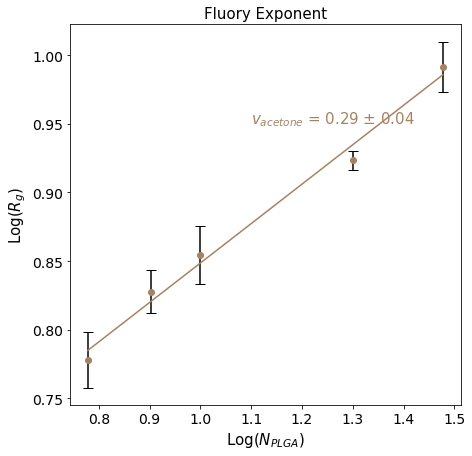

In [223]:
plt.figure(figsize=(7,7))
plt.errorbar(np.log10(n_plga), np.log10(rg_nplga_wat), yerr=rgwat_nplga_std, color='#A58262', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(np.log10(n_plga), gg_wat, color='#A58262')
plt.title(r'Fluory Exponent', fontsize=15)
plt.xlabel(r'Log($N_{PLGA}$)', fontsize=15)
plt.ylabel(r'Log($R_{g}$)', fontsize=15)
plt.tick_params(labelsize=14)
plt.text(1.1, 0.95, r'$v_{acetone}$ = 0.29 ± 0.04', fontsize=15, color='#A58262')